In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,learning_curve,StratifiedKFold, KFold,GridSearchCV,RandomizedSearchCV,cross_validate,train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,confusion_matrix,make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import sklearn
import featuretools as ft
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
import tpot
import warnings
warnings.filterwarnings('ignore')

'1.1.1'

In [5]:

values = pd.read_csv('train_values.csv')
values_raw = pd.read_csv('train_values.csv').drop(['building_id'],axis=1)

labels = pd.read_csv('train_labels.csv')
test_values = pd.read_csv('test_values.csv')
df =values.merge(labels,on='building_id',how='left')
df =df.drop(['building_id'],axis=1)
columns = df.columns
labels = labels["damage_grade"]
df.head(5)


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [32]:
df.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [33]:
df[df.duplicated()] # no duplicated data

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
2702,20,508,11256,2,10,9,6,t,w,q,...,0,0,0,0,0,0,0,0,0,1
3003,21,111,11714,2,10,9,5,t,r,q,...,0,0,0,0,0,0,0,0,0,3
3563,6,1108,5909,2,30,4,7,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4188,27,269,11121,2,15,10,7,n,r,n,...,0,0,0,0,0,0,0,0,0,3
4937,10,1382,5036,2,15,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260546,10,90,10884,2,20,5,5,t,r,q,...,0,0,0,0,0,0,0,0,0,2
260575,4,144,5751,2,5,4,4,t,r,q,...,0,0,0,0,0,0,0,0,0,2
260580,17,875,10462,2,5,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
260583,7,322,2843,2,10,6,6,t,r,n,...,0,0,0,0,0,0,0,0,0,2


In [23]:
df.isna().sum()/df.shape[0] #percentage of null values

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

## Exploratory Data Analysis 


In [24]:
print('Shape of DF:',df.shape)
print(df.dtypes,'\n') #there is no null values
df.info()


Shape of DF: (260601, 40)
building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        

In [25]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [26]:
df[df.duplicated()] # no duplicated data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade


In [27]:
df.isna().sum()/df.shape[0] #percentage of null values

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [28]:
df['damage_grade'].value_counts() #not goodly balanced

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [91]:
undersample = RandomUnderSampler(sampling_strategy='0.5')
SMOTE = SMOTE()

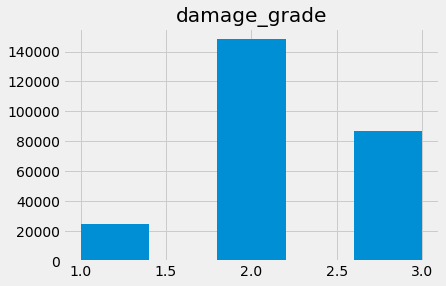

In [29]:
hist = df.hist('damage_grade',bins=5)
plt.show()


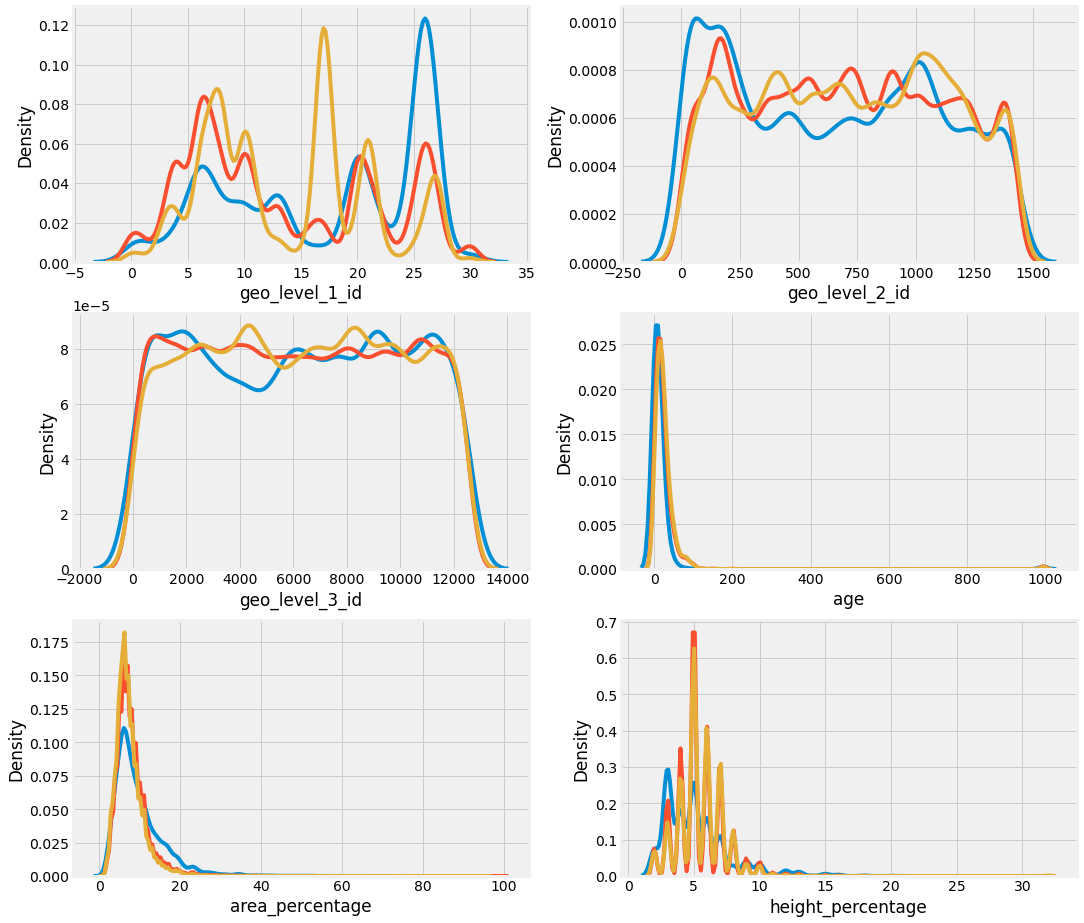

In [6]:
continous_values = ['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage']

def densityPlot(continous_values):
  fig = plt.figure(figsize=(18,16))
  plt.style.use('fivethirtyeight')
  for i,txt in enumerate(continous_values):
    ax = fig.add_subplot(3,2,i+1)
    sns.kdeplot(df.loc[df['damage_grade'] == 1, txt], ax=ax, label='damage_grade==1')
    sns.kdeplot(df.loc[df['damage_grade'] == 2, txt], ax=ax, label='damage_grade==2')
    sns.kdeplot(df.loc[df['damage_grade'] == 3, txt], ax=ax, label='damage_grade==3')
  plt.show()
densityPlot(continous_values)

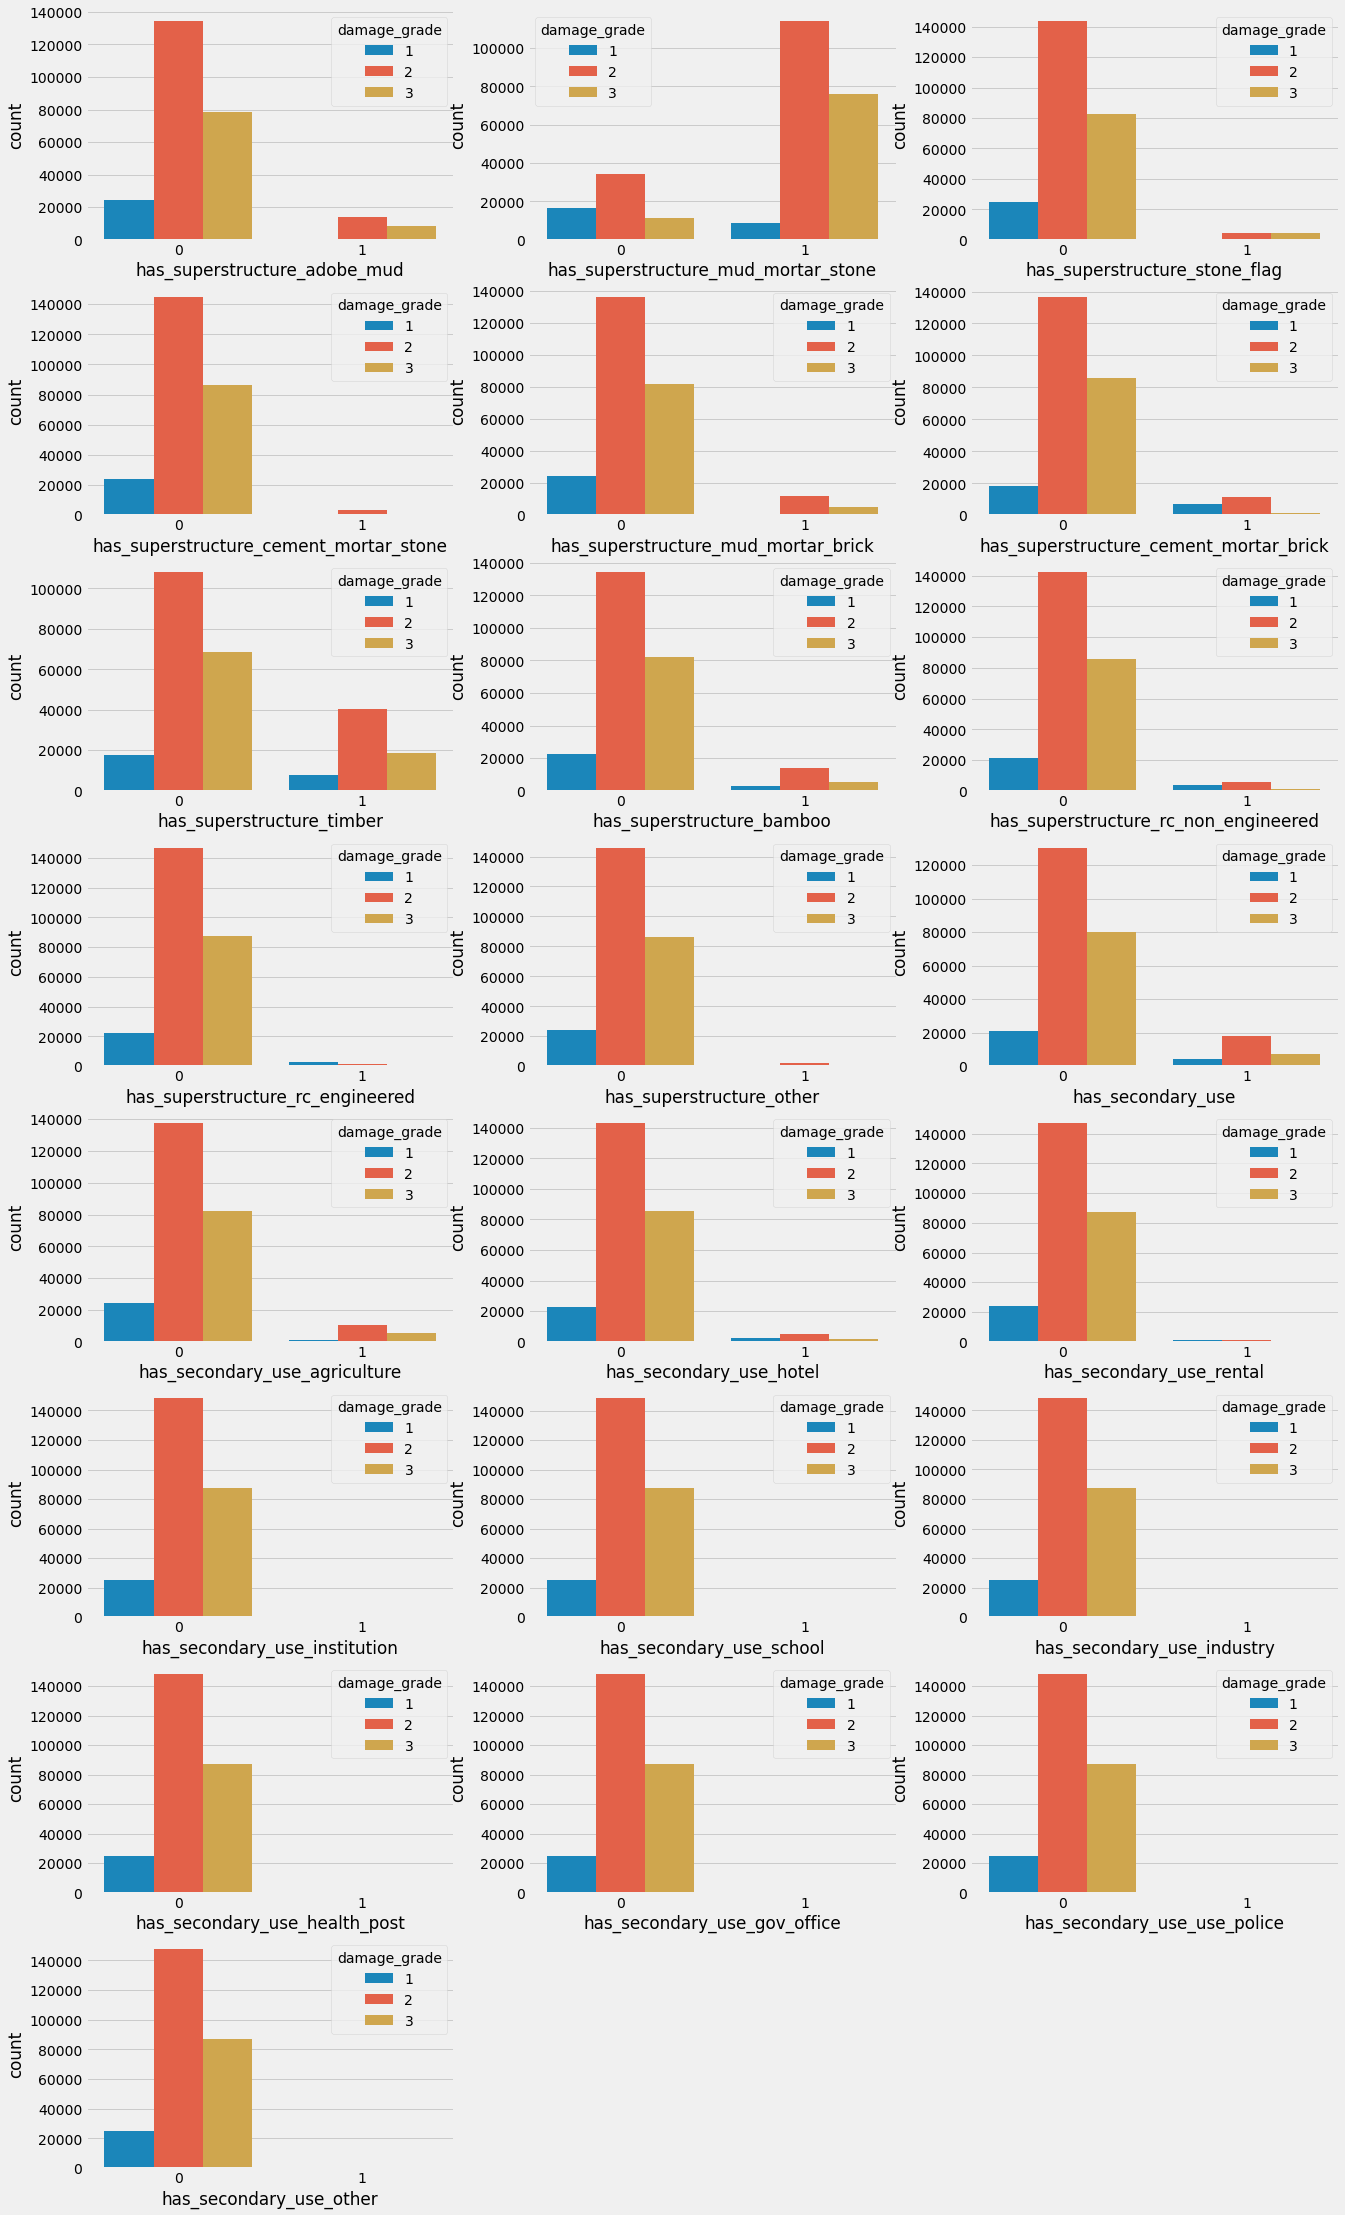

In [7]:
binary_features = df.columns[df.columns.str.startswith('has')]

def countPlot(binary_features):
  plt.rcParams['font.size'] = 18
  plt.style.use('fivethirtyeight')
  fig = plt.figure(figsize=(20,37))
  for i,txt in enumerate(binary_features):
    ax = fig.add_subplot(8,3,i+1)
    sns.countplot(x=df[txt], ax=ax, hue=df['damage_grade'])
  plt.show()
countPlot(binary_features)

Except has_superstructure_cement_mortar_stone other binary features have more zero than 1 and some columns have only zero values

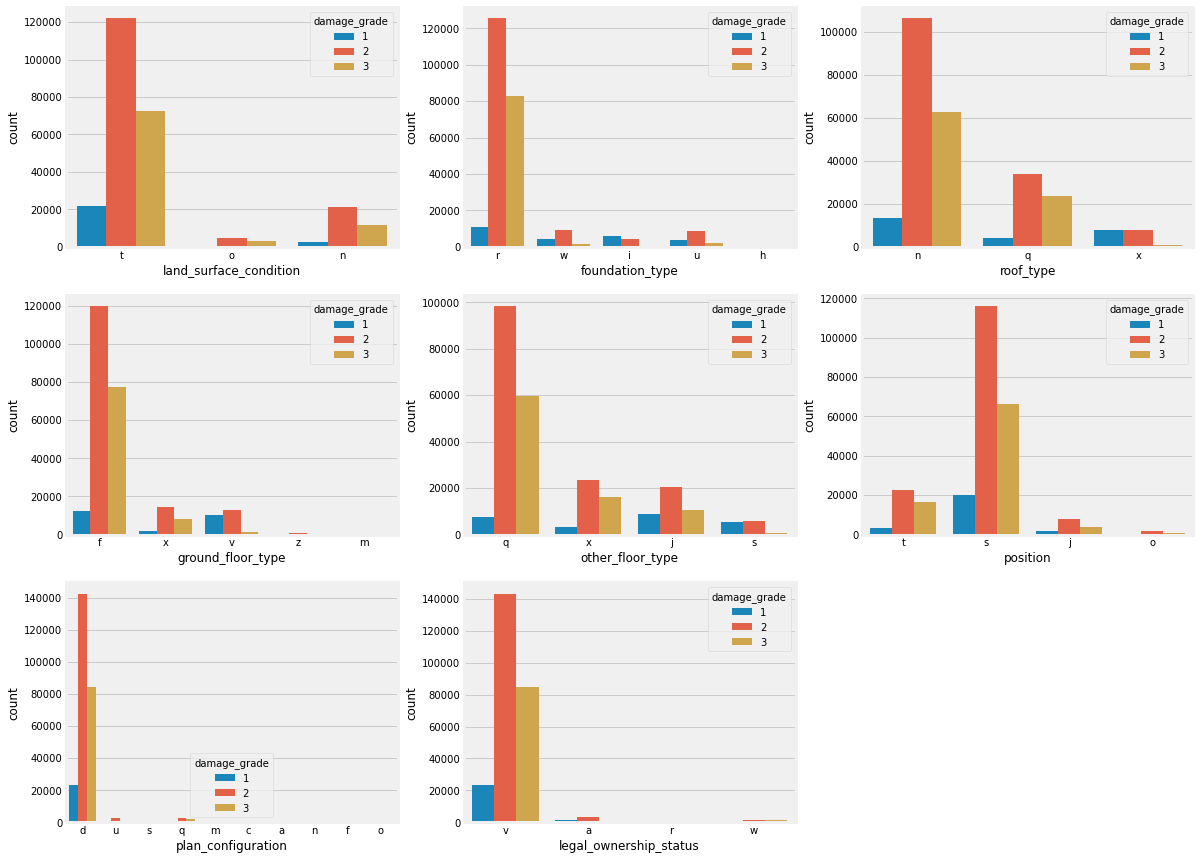

In [6]:
categorical_features = df.select_dtypes(include=object).columns

def catPlot(categorical_features):
  plt.rcParams['font.size'] = 18
  plt.style.use('fivethirtyeight')
  fig = plt.figure(figsize=(18,15))
  for i,txt in enumerate(categorical_features):
    ax = fig.add_subplot(3,3,i+1)
    sns.countplot(x=df[txt], ax=ax, hue=df['damage_grade'])
  plt.show()
catPlot(categorical_features)

In [31]:
values_raw

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
260597,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
260598,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0
260599,26,39,1851,2,10,14,6,t,r,x,...,0,0,0,0,0,0,0,0,0,0


MODELS

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2,f_classif
values_onehot = pd.get_dummies(values_raw, columns=categorical_features, prefix=categorical_features)

encoder = LabelEncoder()
for i in categorical_features:
    values[i] = encoder.fit_transform(values[i])

In [62]:
values_onehot

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
260597,17,715,2060,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
260598,17,51,8163,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
260599,26,39,1851,2,10,14,6,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:

#maxabs = preprocessing.MaxAbsScaler()
#x_scaled=x_scaled.set_axis(values.columns,axis=1)

#x_scaled = pd.DataFrame(standard_scaler.fit_transform(values))

#values_raw_scaled = pd.DataFrame(maxabs.fit_transform(values_onehot))

#values=x_scaled.set_axis(columns[values.columns],axis=1)

#values = pd.get_dummies(values,drop_first = True)
#standard_scaler = preprocessing.StandardScaler()
#x_scaled = pd.DataFrame(min_max_scaler.fit_transform(values))
#print(x_scaled.shape)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled_onehot = pd.DataFrame(min_max_scaler.fit_transform(values_onehot))

print(x_scaled_onehot.shape)


(260601, 39)
(260601, 68)


In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
#x_scaled_generated = pd.DataFrame(poly.fit_transform(x_scaled))
#values = pd.DataFrame(SelectKBest(f_classif, k=20).fit_transform(x_scaled, labels))
#values_onehot = pd.DataFrame(SelectKBest(f_classif, k=20).fit_transform(values_raw_scaled, labels))
values_onehot = pd.DataFrame(SelectKBest(f_classif, k=20).fit_transform(x_scaled_onehot, labels))


In [43]:
x_scaled_onehot

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.200000,0.341275,0.970637,0.125,0.030151,0.050505,0.100000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.266667,0.630694,0.223761,0.125,0.010050,0.070707,0.166667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.700000,0.254380,0.714013,0.125,0.010050,0.040404,0.100000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.733333,0.292922,0.850959,0.125,0.010050,0.050505,0.100000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.366667,0.091801,0.118405,0.250,0.030151,0.070707,0.233333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.833333,0.935529,0.128989,0.000,0.055276,0.050505,0.033333,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
260597,0.566667,0.501051,0.163921,0.125,0.000000,0.050505,0.100000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260598,0.566667,0.035739,0.649558,0.250,0.055276,0.050505,0.166667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260599,0.866667,0.027330,0.147291,0.125,0.010050,0.131313,0.133333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#X = x_scaled
X = x_scaled_onehot
#X = values_onehot
y = labels
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1453)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)


#X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

#pipeline_optimizer = tpot.TPOTClassifier(generations=5, #number of iterations to run the training
                                         #population_size=20, #number of individuals to train
                                         #cv=5) #number of folds in StratifiedKFold
#pipeline_optimizer.fit(X_train, y_train) #fit the pipeline optimizer - can take a long time
#print(pipeline_optimizer.score(X_test, y_test)) #print scoring for the pipeline
#pipeline_optimizer.export('tpot_exported_pipeline.py')

In [34]:
weight1 = (Counter(y_train)[1]/sum(Counter(y_train).values()))
weight2 = (Counter(y_train)[2]/sum(Counter(y_train).values()))
weight3 = (Counter(y_train)[3]/sum(Counter(y_train).values()))
print(weight1)
print(weight2)
print(weight3)

0.09653683806600154
0.5683278971603991
0.3351352647735994


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection


classifiers = {'KNN': KNeighborsClassifier(3),
               'Decision Tree Classifier':DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42,class_weight='balanced'),
               'Random Forests Classifier':RandomForestClassifier(criterion= 'entropy', max_features='sqrt', n_estimators=280,class_weight='balanced'),
               'Adaboost Classifier':AdaBoostClassifier(),
               'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'MLP (5,5)': MLPClassifier(solver='lbfgs',max_iter=500,hidden_layer_sizes=(5, 5), random_state=1),
              'MLP (10,10)': MLPClassifier(solver='lbfgs',max_iter=500,hidden_layer_sizes=(10, 10), random_state=1)}
models = []
names = []
results = []
names = []
scoring = 'accuracy'
last = 0
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
X_train_temp = X_train
y_train_temp = y_train
for name, model in classifiers.items():
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train_temp, y_train_temp, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    #for train_index, val_index in kf.split(X_train_temp):
    #    kfold = model_selection.KFold(n_splits=10, random_state=1452)
    #    #print("TRAIN:", train_index, "TEST:", val_index)
    #    X_train, X_val = X_train_temp.iloc[train_index], X_train_temp.iloc[val_index]
    #    y_train, y_val = y_train_temp.iloc[train_index], y_train_temp.iloc[val_index]
    #    print("Model Name:",name)
    #    model.fit(X_train, y_train)
    #    y_pred = model.predict(X_val)
    #    f1 = f1_score(y_val, y_pred, average="macro")
    #    recall_scores =recall_score(y_val, y_pred, average="macro")
    #    prec_scores =precision_score(y_val, y_pred, average="macro")
    #    print("training:",model.score(X_train_temp, y_train_temp))
    #    print("test:",model.score(X_val, y_val))
    #    print("f1:",f1)
    #    print("recall score:",recall_scores)
    #    print("precision score:",prec_scores)
    #    conf_mat = confusion_matrix(y_val, y_pred)
    #    print(conf_mat)
    #    print()
    #    if f1 > last:
    #        names.append(name)
    #        models.append(model)
    #        last = f1
#print("test")
#name = names[-1]
#print("Model Name:",name)
#model = models[-1]
#y_pred = model.predict(X_test)
#f1 = f1_score(y_test, y_pred, average="macro")
#recall_scores =recall_score(y_test, y_pred, average="macro")
#prec_scores =precision_score(y_test, y_pred, average="macro")
#print("test:",model.score(X_test, y_test))
#print("f1:",f1)
#print("recall score:",recall_scores)
#print("precision score:",prec_scores)
#conf_mat = confusion_matrix(y_test, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Low Damage 1","Medium Damage 2","High Damage 3"])
#disp.plot(cmap=plt.cm.Blues)
#print(conf_mat)
#print()

    

KNN: 0.650844 (0.002296)
Decision Tree Classifier: 0.639332 (0.001559)
Random Forests Classifier: 0.707708 (0.002534)
Adaboost Classifier: 0.644474 (0.002046)
Gradient Boosting Classifier: 0.680991 (0.001955)
MLP (5,5): 0.622563 (0.007627)
MLP (10,10): 0.635557 (0.011238)


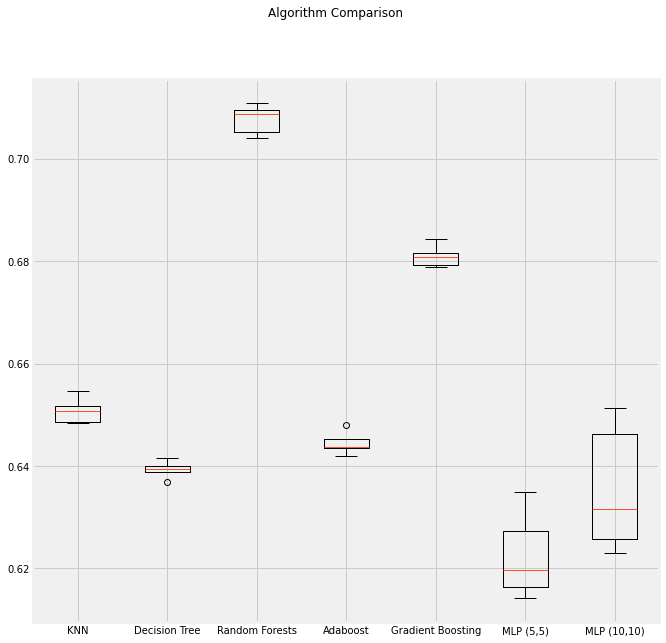

In [24]:
names = ['KNN','Decision Tree','Random Forests','Adaboost','Gradient Boosting','MLP (5,5)', 'MLP (10,10)']
fig = plt.figure(figsize = (10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
#value='{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}'
parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0], 
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1, 0.3]}

xgboost = XGBClassifier()
xgboost_cv = RandomizedSearchCV(xgboost, parameters, cv = 3, n_jobs = -1, verbose = 2)
xgboost_cv.fit(X_train_temp, y_train_temp)

best = xgboost_cv.best_params_
xgboost = XGBClassifier(**best) 
#xgboost = XGBClassifier(eval_metric='rmse',learning_rate= 0.1, n_estimators= 250,gamma= 0, max_depth=3) #eval_metric='auc',learning_rate= 0.01, n_estimators= 900, min_child_weight= 9,gamma= 0.1, reg_lambda= 1, subsample= 0.6
xgb_tuned =  xgboost.fit(X_train_temp,y_train_temp)


    

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Model Name: XGBTUNED
training: 0.7826170376055257
test: 0.7455152433759905
f1: 0.6940598473835476
recall score: 0.6687320578550456
precision score: 0.7333240295557952
[[ 2626  2305    67]
 [ 1056 25259  3459]
 [   85  6292 10972]]



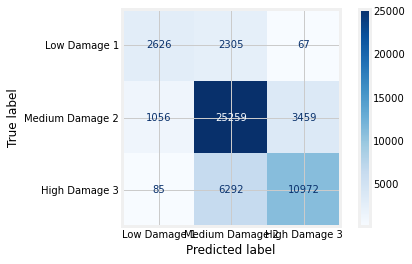

In [30]:
print("Model Name: XGBTUNED")
y_pred = xgb_tuned.predict(X_test)
f1 = f1_score(y_test, y_pred, average="macro")
recall_scores =recall_score(y_test, y_pred, average="macro")
prec_scores =precision_score(y_test, y_pred, average="macro")
print("training:",xgb_tuned.score(X_train_temp, y_train_temp))
print("test:",xgb_tuned.score(X_test, y_test))
print("f1:",f1)
print("recall score:",recall_scores)
print("precision score:",prec_scores)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Low Damage 1","Medium Damage 2","High Damage 3"])
disp.plot(cmap=plt.cm.Blues)

In [89]:
rf =RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
#rf.fit(X_train, y_train)
rf.fit(X_train, y_train)
results = list(zip(X, rf.feature_importances_))
importance = pd.DataFrame(results, columns = ["Feature", "Importance"])
importance = importance.sort_values(by="Importance", ascending=False)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average="macro")
recall_scores =recall_score(y_test, y_pred, average="macro")
prec_scores =precision_score(y_test, y_pred, average="macro")
print("training:",rf.score(X_train, y_train))
print("test:",rf.score(X_test, y_test))
print("f1:",f1)
print("recall score:",recall_scores)
print("precision score:",prec_scores)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print()
importance

training: 0.694459900230238
test: 0.6844458087910823
f1: 0.6091764654319819
recall score: 0.5816783493966118
precision score: 0.6638350970685539
[[ 1929  2995    81]
 [ 1120 24335  4231]
 [   84  7936  9410]]



,Feature,Importance
0,0,0.543381
7,7,0.098000
2,2,0.070475
6,6,0.047209
4,4,0.037765
10,10,0.033927
1,1,0.033095
3,3,0.032515
8,8,0.026631
5,5,0.018038


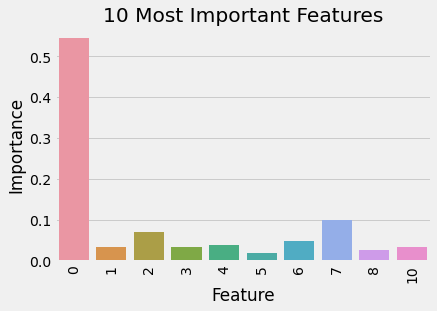

In [90]:
importance_10 = importance.head(10)
plot = sns.barplot(x=columns[importance_10["Feature"]], y=importance_10["Importance"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("10 Most Important Features")
plt.show()